## MOHAMMAD AVESH HUSAIN

## Task- Prediction using supervised Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [2]:
data = pd.read_csv("student_scores - student_scores.csv")

In [3]:
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
#checking basic integrity
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


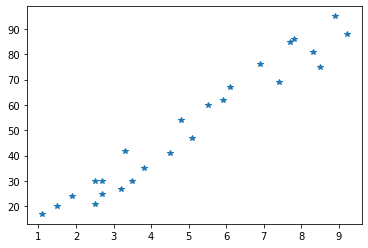

In [6]:
#visualizing the data
plt.plot(data['Hours'],data['Scores'],'*')

In [7]:
#intantiating model
reg_model = LinearRegression()


In [8]:
#prepairing values
x = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

In [9]:
# dividing into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

In [10]:
# Training the model
reg_model.fit(x_train,y_train)
reg_model

LinearRegression()

In [11]:
# getting intercept and coefficient from the trained model
model_intercept = reg_model.intercept_
model_coef = reg_model.coef_
print('Intercept=',model_intercept)
print('Coefficient=',model_coef)

Intercept= 1.8707455429497912
Coefficient= [9.95819213]


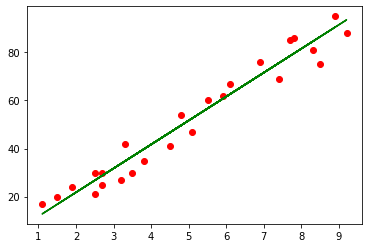

In [12]:
# plotting best fit line using acquired data from fitted model

best_fit_line = model_intercept+model_coef*x

plt.scatter(x,y,color='red')

plt.plot(x,best_fit_line,color='green')


In [13]:
#Predicting values
y_predict = reg_model.predict(x_test)
y_predict

array([26.76622587, 93.48611316, 39.71187564, 16.80803374, 28.7578643 ])

In [14]:
compare_result= pd.DataFrame({"True Values":y_test,"Predicted Values":y_predict})
compare_result

,True Values,Predicted Values
0,30,26.766226
1,88,93.486113
2,35,39.711876
3,20,16.808034
4,25,28.757864


## Evaluation 

In [15]:
reg_model.score(x_test,y_test)

0.9714834608072798

In [16]:
metrics.mean_absolute_error(y_test,y_predict)

4.076318697509938

## checking for out of sample value 9.25 hr/day

In [17]:
value = np.array(9.25).reshape((1,1))
prediction = reg_model.predict(value)
prediction

array([93.98402276])

## .......................................................................................................................

## Training a random forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
forest_reg = RandomForestRegressor(n_estimators=35,max_depth=3)

In [20]:
forest_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=35)

In [21]:
y_predict_forest=forest_reg.predict(x_test)


In [22]:
compare_randomforest_data = pd.DataFrame({'True_value:':y_test,'pre':y_predict_forest})
compare_randomforest_data

,True_value:,pre
0,30,23.514286
1,88,89.295442
2,35,36.623333
3,20,20.011429
4,25,27.308571


In [23]:
forest_reg.score(x_test,y_test)

0.9830644884076686

In [24]:
metrics.mean_absolute_error(y_test,y_predict_forest)

2.3448979591836725

In [25]:
forest_reg.predict(value)

array([89.29544218])

## Comparing both models

In [26]:
compare_model = pd.DataFrame({'Study_hours':data['Hours']
                              ,  'Linear regressor':reg_model.predict(data['Hours'].values.reshape((-1,1)))\
                              ,'True_value':data['Scores']\
                              ,'Random Forest':forest_reg.predict(data['Hours'].values.reshape((-1,1)))})\


compare_model 

,Study_hours,Linear regressor,True_value,Random Forest
0,2.5,26.766226,21,23.514286
1,5.1,52.657525,47,50.541429
2,3.2,33.736960,27,30.972857
3,8.5,86.515379,75,80.200348
4,3.5,36.724418,30,35.174762
5,1.5,16.808034,20,20.011429
6,9.2,93.486113,88,89.295442
7,5.5,56.640802,60,58.424762
8,8.3,84.523740,81,81.102729
9,2.7,28.757864,25,27.308571


In [27]:
pickle.dump(reg_model,open('reg_modle.pkl','wb'))

In [28]:
pickle.dump(forest_reg,open('forest_model.pkl','wb'))